# 컴퍼티션 소개


이 notebook은 머신러닝을 시작하는 기초적인 방법을 보여주기 위한것이므로 복잡한 머신러닝 모델을 사용하거나 데이터들을 조합하여 새로운 피쳐를 만들지는 않습니다. 

고객이 대출금을 상환할 수 있는지의 여부는 비즈니스에서 중요한 사항입니다. 신용기록이 부족하거나 없어 대출받기 힘든 사람들이 있습니다. Home Credit에서는 통신 및 거래정보등 다양한 데이터를 활용하여 고객의 상환능력을 예측합니다. 이는 standard supervised classification 입니다. 

* __Supervised__: labels는 training data에 있는 feature이고 모델을 학습하여 labels를 예측하는것이 목적입니다.

* __Classification__: label은 2진 변수입니다. 0은 대출을 제 때 상환하는것을, 1은 대출 상환이 어려운것을 나타냅니다. 


# Data

데이터들은 은행계좌가 없는 사람들에게 신용정보를 제공하는 [Home Credit](http://www.homecredit.net/about-us.aspx)에서 제공합니다.  


7개의 source data가 있습니다:

* application_train/application_test:  main train/test 데이터입니다. home credit에 대출신청한 고객들의 정보가 있습니다. 각대출정보들은 각 행으로 이루어져있고 `SK_ID_CURR`라는 feature로 구분됩니다. training application data에는 `TARGET`이라는 feature가 있고 0은 대출 상환이 된것을, 1은 상환이 되지 않은것을 의미합니다. 
 
 
* bureau: 다른 금융기관으로 부터 제공받은 고객의 이전 신용에 관한 데이터입니다. bureau에는 이전 신용정보(credit)가 각 행으로 이루어져있고 한 대출(loan)에 다양한 신용정보(credit)가 있을 수 있습니다. 

* bureau_balance: 이전 신용정보(credit in bureau)의 월별 정보입니다. bureau에 있는 이전 신용 정보의 월별 데이터입니다. 하나의 신용 정보는 여러 개의 행에 있을 수 있고 한 행당 한 달입니다. 

* previous_application: application data에 있는 대출을 가지고 있는 Home credit 고객의 이전 application입니다. application data에 있는 각 대출은 여러개의 행을 가질 수 있습니다. 각 이전 대출신청은 하나의 행을 가지고 `SK_ID_PREV` 칼럼에 의해 구분됩니다.

* POS_CASH_BALANCE: home credit의 월별 POS 또는 현금대출 데이터입니다. 각 행은 이전 POS 또는 현금 대출의 월별 데이터이고 여러개의 행으로 구성될 수 있습니다. 

* credit_card_balance: home credit 신용 카드 고객들의 월별 데이터. 각 행은 신용 카드 한 달 잔액이며, 하나의 신용카드는 많은 열을 가질 수 있습니다.


* installments_payment: 할부에 대한 결제 내역. 매 결제 마다 하나의 행을 가지고 있습니다.

이 diagram은 모든 데이터들의 관계를 보여줍니다. 

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

`HomeCredit_columns_description.csv` 파일에 모든 칼럼에 대한 설명이 제공됩니다. 


__Follow-up Notebooks__

이 컴퍼티션에 대해 더 공부하고 싶으면 아래 노트북들을 참고하시기 바랍니다.

* [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
* [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
* [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
* [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
* [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
* [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)
* [Automated Model Tuning](https://www.kaggle.com/willkoehrsen/automated-model-tuning)
* [Model Tuning Results](https://www.kaggle.com/willkoehrsen/model-tuning-results-random-vs-bayesian-opt/notebook)


## Imports

머신러닝 데이터 전처리와 시각화에 주로 사용되는 패키지들을 사용합니다 : `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [1]:
# 데이터를 가공하기 위한 패키지
import numpy as np
import pandas as pd 

# categorical variables 데이터를 다루기 위한 패키
from sklearn.preprocessing import LabelEncoder

# 파일 관리를 위한 패키지 
import os

# 경고를 무시하기 위한 패키지 
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지 
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data 

가장 먼저 우리가 사용할 수 있는 데이터들의 리스트를 나열합니다. 총 9개의 파일이 있습니다. 학습할 메인 training 데이터(target 포함)와 test할 데이터 그리고 submission file가 각각 1개씩 있습니다. 그리고 각 대출에 추가적인 정보를 가지고있는 6개의 데이터 파일들이 있습니다.


In [2]:
# 학습을 위한 훈련데이터의 리스트를 불러옴
print(os.listdir("../input/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# 학습할 데이터 간략하게 살펴보기 
app_train = pd.read_csv('../input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


training data는 307511개의 대출 정보들이 있고 target(우리가 예측하려는 feature)을 포함한 122개의 feature들이 있습니다.

In [4]:
# 테스트 데이터 간략하게 살펴보기 
app_test = pd.read_csv('../input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


test set은 작고 target column이 없습니다. 

# 탐색적 분석(Exploratory Data Analysis)

탐색적분석은 통계량을 계산하고 경향성(trend)을 파악하고, 이상치(anomaly)를 찾아내고, 패턴(pattern)을 발견하고 데이터 속에서 관계(relationship)를 찾아내기 위한 feature를 만들어내는 open-ended 프로세스 입니다. EDA의 목적은 데이터가 우리에게 어떤 것을 말해주는지 파악하는 것입니다. 일반적으로 전체적으로 탐색한 후 흥미로운 부분을 발견하면 세부적으로 들어갑니다. 그리고 이것은 그 자체로 흥미로울 수 있지만 우리가 어떤 feature를 선택할지 알려줌으로써 머신러닝 모델 선택에 도움을 줄 수 있습니다. 


## Target Column의 분포 확인하기

target은 우리가 예측해야하는 칼럼입니다. 제 때 상환되는 '0' 또는 대출 상환에 어려움이 있는 '1' 중 하나입니다. 각 범주에 속하는 대출의 수를 확인할 수 있습니다. 

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

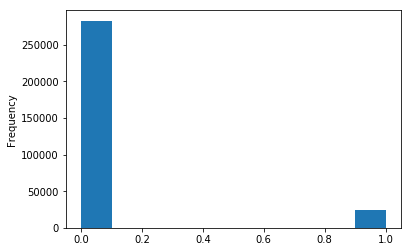

In [6]:
app_train['TARGET'].astype(int).plot.hist();

이 정보로 부터 균형이 맞지 않는(imbalanced) 데이터라는것을 알 수 있습니다.(http://www.chioka.in/class-imbalance-problem/).
제 때 상환되는 대출의 수가 그렇지 않은 경우보다 압도적으로 많습니다. 정교한 머신러닝 모델을 고려한다면 이러한 데이터의 불균형(imbalance)를 고려한 가중치를 설정할 수 있습니다.(http://xgboost.readthedocs.io/en/latest/parameter.html)

## 결측치 파악하기(Examine Missing Values)

다음으로 할 것은 각 칼럼(column)의 결측치(missing value) 비율이 얼마나되는지 확인하는것입니다.

In [7]:
# 각칼럼의 결측치 비율을 나타내는 함수
def missing_values_table(df):
        # 전체 결측치 값
        mis_val = df.isnull().sum()
        
        # 결측치 값을 전체 데이터 크기로 나눠서 비율을 확인
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # 결과를 테이블에 합침
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 칼럼의 이름을 수정
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # percentage에 따라 내림차순으로 정렬
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # 결과 출력
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # 결과를 반환
        return mis_val_table_ren_columns

In [8]:
# 결측치 통계량
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 구축할 때 결측치를 채워야합니다. 나중에 XGBoost를 사용할 때는 [결측치](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase)를 채울 필요는 없습니다. 다른 대안은 missing values의 percentage가 높은 column을 삭제하는것입니다. 하지만 나중에 머신러닝 모델에서 중요한 칼럼일 수 있으므로 일단은 삭제하지 않습니다.

## Column Types
각 칼럼의 data type을 살펴보겠습니다. `int64` 와`float64` 은 수치형 데이터입니다. 이것은 [이산형(discrete)일 수도 연속형(continuous)](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)일 수도 있습니다. `object` 문자형 데이터이고 [범주형 데이터](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) 입니다.

In [9]:
# 칼럼들의 각 데이터 타입의 수
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# 각 object column의 unique한 classes의 수
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분 범주형 변수(categorical variables)들은 상대적으로 적은 수의 unique entries를 가지고 있습니다. 앞으로 이런 범주형 변수(categorical variables)을 다루는 방법들을 찾아야 합니다. 

## 범주형 데이터 인코딩(Encoding Categorical Variables)

더 나아가기 전에 우리는 범주형 변수를 다룰 필요가 있습니다. 머신러닝 모델은 범주형 변수를 다룰 수 없습니다([LightGBM](http://lightgbm.readthedocs.io/en/latest/Features.html))과 같은 일부 모델은 제외). 따라서 우리는 이 변수들을 모델에 전달하기 전에 숫자로 인코딩 해야합니다. 이를 수행하는 두 가지 주요 방법은 다음과 같습니다.

* Label encoding: 범주형 데이터의 각 고유의 값에 숫자를 부여하는것입니다. 새로운 칼럼은 생성되지 않습니다. 다음 예시를 참고하세요

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

* One-hot encoding: 범주형 데이터의 각 카테고리에 고유의 칼럼을 생성해주는것입니다. 고유의 칼럼 값들은 해당 관측값은 1로, 이를 제외한 모든 다른 범주의 값은 0으로 바꾼 칼럼이 됩니다.

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)

레이블 인코딩의 문제점은 각 카테고리에 순서를 임의로 매긴다는 것입니다. 각 카테고리에 임의로 할당된 값들은 고유의 특성을 반영하지 않습니다. 남/여로 2개의 범주가 있다면 레이블링 인코딩을 사용해도 괜찮습니다. 하지만 3개 이상의 범주가 있다면 one-hot 인코딩을 사용하는것이 더 안전합니다. 예를들어 개발자 = 4, 데이터사이언티스트 = 1 로 인코딩 한다면 가중치가 생기게 되고 이것은 우리가 원하는것이 아닙니다. 

[관련 토론이 있는데 참고하시면 좋을것 같습니다](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). 

one-hot인코딩은 안전한 방법이지만 칼럼의 수가 급격하게 늘어난다는 단점이 있습니다. 이러한 문제를 해결하기 위해서 [PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) 라는 방법을 사용할 수 있습니다. 또는 [dimensionality reduction methods](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) 을 사용할 수 있습니다.  

이 노트북에서는 범주형 데이터 중에서 카테고리가 2개인 칼럼에 대해서는 레이블링 인코딩을 나머지 칼럼에 대해서 one-hot 인코딩을 사용할 것입니다.


### Label Encoding and One-Hot Encoding

레이블링 인코딩은 Scikit-Learn의 `LabelEncoder`를 사용하고 one-hot 인코딩은 pandas의  `get_dummies(df)` 함수를 사용할 것입니다.

In [11]:
# 레이블 인코더 객체 만들기
le = LabelEncoder()
le_count = 0

# 각 칼럼 순회하기
for col in app_train:
    if app_train[col].dtype == 'object':
        # 2개 이하의 고유의 값을 가진 칼럼이 있으면
        if len(list(app_train[col].unique())) <= 2:
            #학습하기
            le.fit(app_train[col])
            #값 바꾸기
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 몇개의 칼럼이 인코딩 되었는지 
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
# 범주형 데이터의 one-hot 인코딩
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Training and Testing Data 정렬(Aligning)
training data에는 있고 testing data에는 없는 category가 One-hot 인코딩과정을 거치면서 training data에 칼럼이 더 많이 생기게 된다. features(columns)가 같아야 하기 때문에 우리는 dataframe을 정렬(align)할 필요가 있다. 먼저 training data으로 부터 target column을 추출한다(testing data에는 없지만 나중에 필요한 칼럼이기 때문이다). align할 때 row가 아닌 column에 따라 align하기 때문에 `axis = 1`로 설정해야한다. 

In [13]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


one-hot encoding을 하면 칼럼의 수가 급격하게 증가하기 때문에 데이터셋의 사이즈를 줄여 줄 필요가 있다. [(dimensionality reduction)](https://en.wikipedia.org/wiki/Dimensionality_reduction)


## 다시 탐색적 분석(EDA)으로 돌아와서

### 이상치(Anomalies)

이상치는 잘못 입력 된 숫자, 측정 장비의 오류 또는 유효하지만 극단적인 측정일 수 있습니다. 이상치를 다루는 방법중에 하나는 `describe` 메소드를 사용하여 통계량을 확인하는 
`DAYS_BIRTH` 컬럼은 현재 대출 신청과 관련하여 기록되었고 음수로 표현되고있습니다. 이 칼럼의 년도로 나타내기 위해서 -1을 곱하고 365일로 나눠줄 수 있습니다.


In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

하한 또는 상한에 대해서 이상치가 없는것 같습니다. 근속일수에 대해서도 확인해보겠습니다.

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

최대값이 1000년이상인걸로 보아 합리적이지 않습니다.

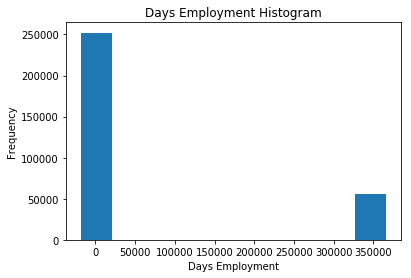

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


이상치에서 채무 불이행 비율이 낮게 나왔습니다. 이상치를 다루는 방법에는 정해진 규칙이 따로 없고 상황에 따라 달라집니다. 가장 안전한 이상치를 결측값으로 설정하고 값을 채워주는 것입니다. 이번 경우에는 이상치들이 모두 같은 값이므로 같은 공통적인 부분이 있으면 같은 값을 대입해줍니다. 이상징후가 보이는 값들이 중요할 수 있으므로 숫자형태가 아닌 `np.nan`로 값을 채워 넣어주어 이 중요성을 머신러닝 모델에게 알려줘야 합니다. 그리고 이상징후를 보이는 행인지 알려줄 수 있는 칼럼을 만듭니다. 칼럼의 값은 부울값으로 합니다. 


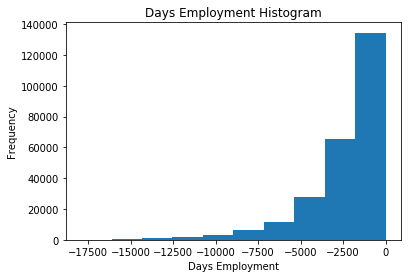

In [18]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

분포는 우리가 기대할 수있는 것보다 훨씬 더 많을 것으로 보여주며 모델의 원래 값이 아니라는 것을 보여주기 위해 새로운 column을 만들었습니다. 데이터 프레임에서`DAYS`의 컬럼은 이상치(outliers)없이 우리가 예상 했던 모양이 나옵니다. train data에 하는 작업은 test data에도 똑같이 해줘야 합니다. 새로운 컬럼을 생성하고 테스트 데이터에서 기존 컬럼을`np.nan`으로 채 웁니다.

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

지금까지 범주형 데이터와 이상치를 처리했습니다. 데이터를 이해하는 방법중 하나는 피쳐들과 target사이의 상관관계를 확인하는 것입니다.(피어슨 상관관계 계수 `.corr` dataframe 함수)

상관계수는 피쳐들간의 관계를 나타내는 가장 좋은 방법은 아니지만 아이디어를 제공할 순 있습니다. 상관계수의 값에 대해 해석하는 몇몇 [방법](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)이 있습니다. 


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”


In [20]:
# 상관계수를 구하고 정렬하기
correlations = app_train.corr()['TARGET'].sort_values()

# 상관계수 
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

`DAYS_BIRTH` 칼럼을 봤을 때 양의 상관관계가 있습니다. 하지만 이 칼럼의 값들은 음수이기 때문에 나이로 변환하여 상관관계를 다시 구한다면 음의 상관관계를 보이게 될것입니다. 이는 곳 나이가 많을 수록 target값은 0에 가까워 지는것이고 대출을 상환할 확률이 커진다는것을 의미합니다.

### Effect of Age on Repayment

In [21]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830988099

x축을 나이로 만들어 그래프를 그린다면 좀 더 이해하기 수월 할 것입니다. 

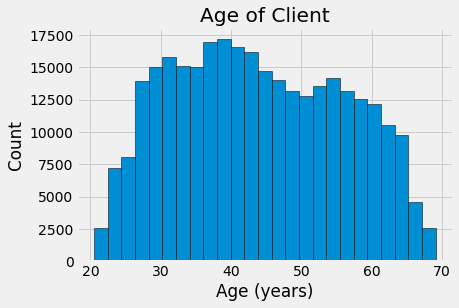

In [22]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

나이의 분포를 그려봤을 때 이상치는 없고 모든 나이는 합리적으로 보입니다. target에 대한 나이의 영향을 시각화 하기 위해서 우리는 target의 값에 따라 색이 다른 [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE)를 살펴볼 것입니다.

[KED plot은 하나의 변수의 분포를 보여줍니다](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) 그리고 부드럽게 연결된 히스토그램이 부드럽게 연결된것을 볼 수 있는데 이는 데이터 포인드들을 가우시안 커널을 사용하여 계산하고 그 값들을 평균냈기 떄문입니다. 여기서 seaborn 의  `kdeplot`을 사용하여 그래프를 그릴 것입니다.

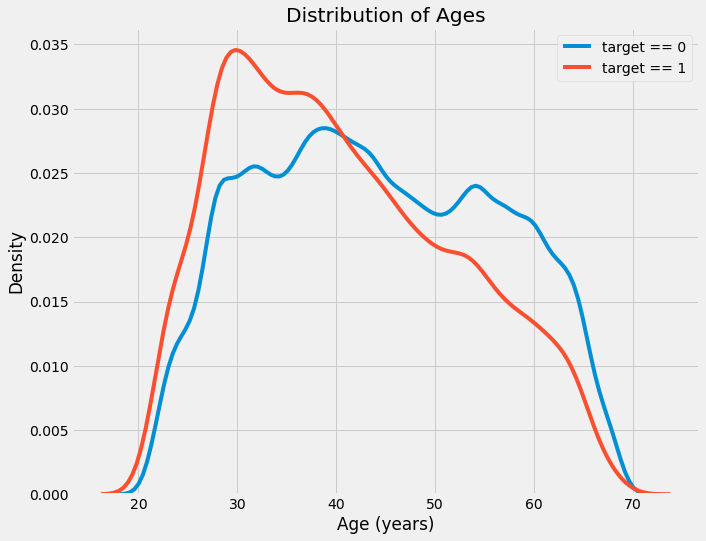

In [23]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

target == 1 커브는 나이가 상대적으로 어린쪽으로 치우쳐있습니다. 영향을 크게주는 상관관계(-0.07)는 아니지만 이 변수는 머신러닝 모델에는 유용할 수 있습니다. 어쨋든 영향을 주기 때문입니다. 다른 관점에서 관계를 살펴보겠습니다. 나이를 그룹으로 분류한 뒤 평균 부채 상환의 실패를 확인할 수 있습니다.

먼저 그래프를 만들기위해 나이의 범주를 5년 간격으로 `cut` 하겠습니다. (bins = 5 years)
각 bin에는 target의 평균값을 대입하겠습니다. 이는 연령대 별로 채무 이행률에 대한 정보를 제공해줄 수 있습니다. 

In [24]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


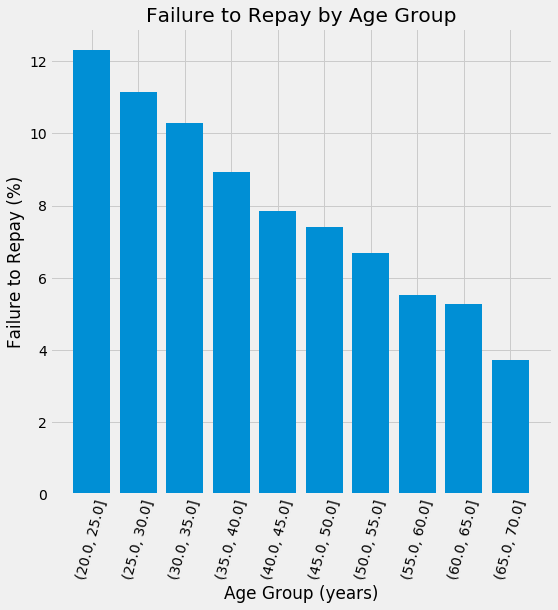

In [26]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

경향성이 뚜렷하게 보입니다. 연령대가 낮아질수록 채무 상환을 불이행 할 확률이 높아집니다. 가장 어린 3개의 연령대에서 채무 상환에 실패하는 비율이 10퍼센트 이상이 나왔고 가장 높은 연령대에서 5퍼센트 미만의 채무불이행률이 나타났습니다. 

이러한 정보는 은행에서 바로 사용될 수 있습니다. 젊은층의 고객들이 대출금을 상환할 가능성이 낮기 때문에 더 많은 지침이나 재정 계획 정보를 받아야 할것입니다. 이는 은행측이 젊은 고객을 차별해야하는 것을 의미하지 않습니다. 젊은층이 제 시간에 채무를 상환할 수 있도록 사전조치를 취하는것이 현명한 선택입니다. 

### 외부 데이터(Exterior Sources)
target과 음의 상관계수가 가장큰 3개의 변수는 `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3` 입니다. documentation을 참고하면 이 feature들은 외부 데이터소스를 정규화하여 점수로 나타낸것을 알 수 있습니다. 이것이 정확히 무엇을 의미하는지는 확인할 순 없지만 수많은 데이터 소스를 사용하여 매긴 신용등급 일 수 있습니다.

이 변수들을 살펴보겠습니다. 

가장 먼저 target과 `EXT_SOURCE` 의 상관관계를 파악해보겠습니다.


In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


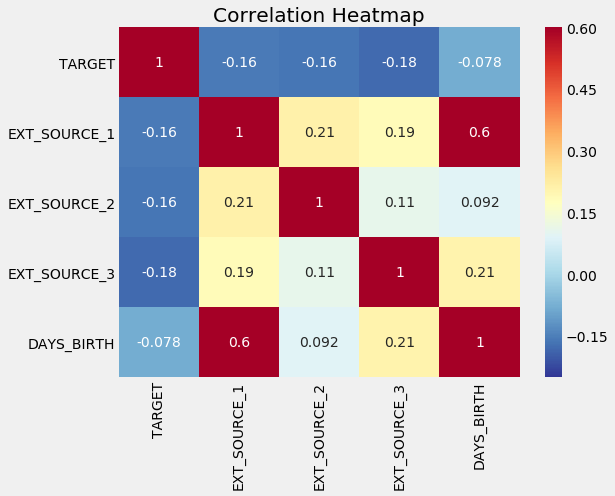

In [28]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

`EXT_SOURCE`값들은 target과 모두 음의 상관관계를 가지고 있습니다.  `EXT_SOURCE` 값이 증가할 수록 고객들이 부채를 상환할 가능성이 높아진다는것을 의미합니다. `DAYS_BIRTH` 는 `EXT_SOURCE_1` 와 양의 상관관계를 가지고 있는데 이는 `EXT_SOURCE_1`값을 계산하는 여러 요소중에 나이도 포함되어 있다는것을 알 수 있습니다.

target의 값에 따라서 색을 다르게하여 각 feature들의 분포를 살펴보겠습니다. 각 변수들이 target에 어떻게 영향을 미치는지 시각화해보겠습니다.

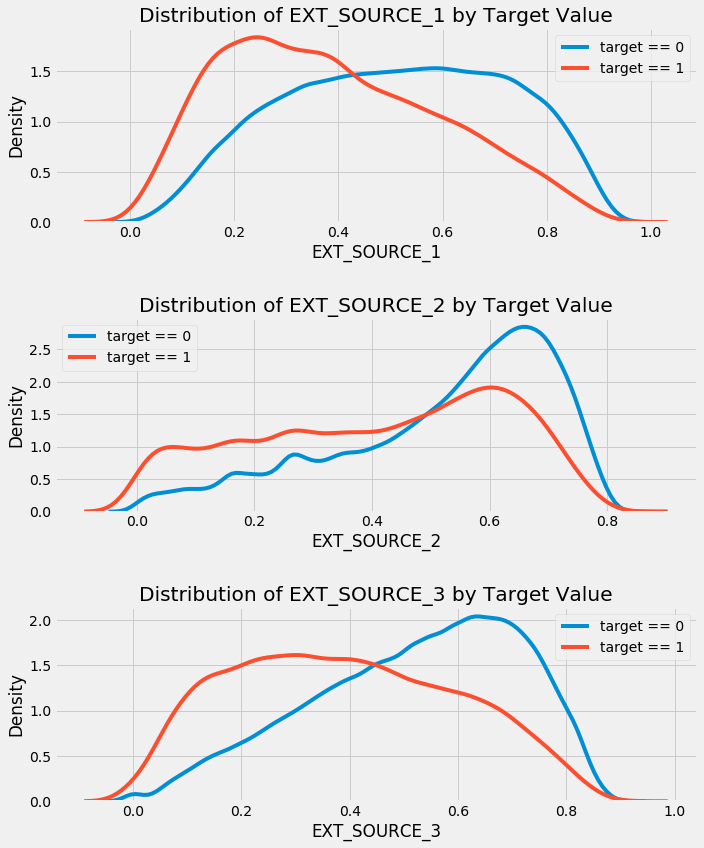

In [29]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3`이 target 값에 따라 가장 큰 차이를 보여주고 있습닏.ㅏ 이 feature가 채무 상환과 가장 관계가 있다는것을 알 수 있습니다. 그 관계는 사실 매우 [약합니다.](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) 하지만 여전히 머신러닝 모델이 채무 불이행 여부를 예측하기에는 유용합니다.

## Pairs Plot
최종 탐색 적 플롯으로`EXT_SOURCE` 변수와`DAYS_BIRTH` 변수의 쌍을 그려 볼 수 있습니다. 
[Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)은 여러 변수들 쌍의 관계를 보여줄 뿐 아니라 하나의 변수의 분포까지 볼 수 있기 때문에 좋은 툴이라고 할 수 있습니다. seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 위 삼각형에는 산점도, 대각선에는 히스토그램, 아래 삼각형에는 2D 커널 밀도함수와 상관계수를 나타냅니다. 


C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\heayonghwang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\

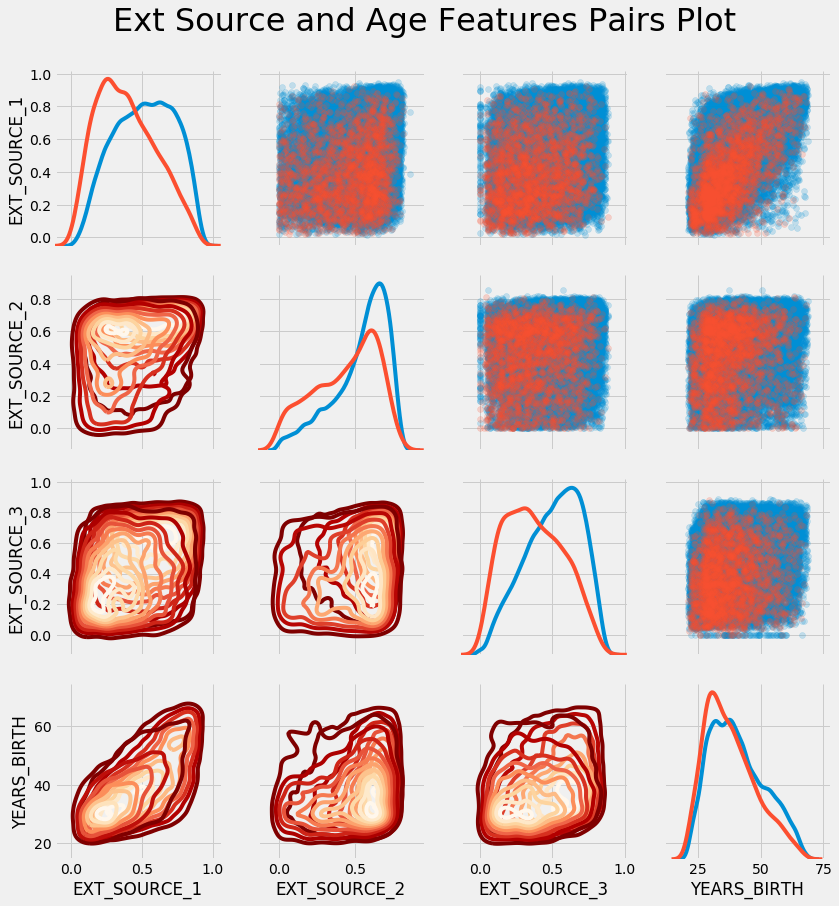

In [30]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

이 플랏에서 빨간색은 채무가 상환되지 않은것을 파란색은 상환된것을 나타냅니다. 데이터를 보면 서로 다른 관계를 확인할 수 있습니다. 
`EXT_SOURCE_1`과`DAYS_BIRTH` (또는 이에 상응하는`YEARS_BIRTH`) 사이에 적당한 양의 선형적인 관계가있는 것처럼 보입니다, 이것은이 기능이 클라이언트의 나이를 고려할 수 있음을 나타냅니다.

# Feature Engineering

주어진 데이터에서 얼마나 유용한 feature들을 생성할 수 있느냐가 kaggle comptetition에서 중요합니다. 
[gradient boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)). 

feature engineering 하는것이 hyperparameter를 튜닝하는것보다 머신러닝 모델의 성능을 향상시키는데 많은 기여를 합니다.[관련 기사](https://www.featurelabs.com/blog/secret-to-data-science-success/). 

Andrew Ng 교수는 다음과 같은 말을 좋아합니다 : "applied machine learning is basically feature engineering."

적합한 모델을 선택하고 최적화를 하는것도 중요하지만 머신러닝 모델은 오로지 데이터로부터 학습합니다. 데이터가 가능한 한 이 작업과 관련있게 하는것은 데이터 사이언티스트의 역할입니다.( [또는 몇몇 툴](https://docs.featuretools.com/getting_started/install.html))


Feature engineering은 일반적인 프로세스이고 feature construction(주어진 데이터에서 새로운 feature를 생성하는것) 과 feature selection(가장 중요한 feature를 선택하거나 차원축소하는 방법)를 모두 포함합니다. 두 방법에 필요한 테크닉들이 많이 있습니다.

여러 방법들 중 다음 두개의 feature engineering을 하겠습니다.

* Polynomial features
* Domain knowledge features


## Polynomial Features

feature construction은 [polynomial features](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) 라고도 불립니다. 
이 방법은 기존의 feature를 거듭제곱하여 나타내거나, 변수들간의 상호작용을 고려할 수 있습니다. 예를들어서 `EXT_SOURCE_1^2`, `EXT_SOURCE_2^2` 또는  `EXT_SOURCE_1` x `EXT_SOURCE_2`, `EXT_SOURCE_1` x `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` x   `EXT_SOURCE_2^2` 등이 있습니다. 이렇게 여러개의 개별적인 항들을 곱한것을 [interaction terms](https://en.wikipedia.org/wiki/Interaction_(statistics) 라고 부릅니다. 변수들 간의 상호작용을 잡아내기 때문입니다. 다시말해 두 변수 각각 개별적으로 target에 큰 영향을 주지 않을 수 있지만 둘을 상호관계를 고려한다면 target과 관계를 가질 수 있기 때문입니다. [상호작용 모델은 통계 모델에서 일반적으로 사용됩니다.](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) 
이것이 우리의 모델이 대출상환 예측을 하는데 도움을 줄 수 있는지 확인하기 위해 몇가지 방법이 있습니다. 

[-polynomial features in his excellent book Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) 
더 많은 정보가 필요하신 분에게 도움이 될 수 있는 정보입니다. 

다음 코드에서  `EXT_SOURCE` 와 `DAYS_BIRTH` 변수를 사용하여 polynomial features를 만들것입니다. Scikit-Learn 에[PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) 라고 불리는 좋은 툴이 있습니다.

여기서는 3차까지 설정하겠습니다. degree가 높아지면 스케일이 기하급수적으로 커지기도하고  [ overfitting ](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)의 문제가 생길 수 있기 때문입니다. 
 

In [31]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [32]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


상당히 많은 수의 칼럼을 새로 만들었습니다. 이름을 확인하기 위해 `get_feature_names`함수를 사용합니다. 

In [33]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

 우리는 이러한 새로운 35개의 feature 중 어느 것이 target과 상관관계가 있는지를 알 수 있습니다.

In [34]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


새로만든 변수 중 몇몇 변수들은 기존에 있던 feature들 보다 target과의 상관계수가 큽니다. 머신러닝 모델을 설계할 때 실제로 이 feature를 사용하거나 사용하지 않고 머신러닝 모델 학습에 도움이 되는지의 여부를 확인할 수 있습니다. 대부분 머신러닝에서 특정 feature가 머신러닝 학습에 도움이 될지 안될지 여부를 확인하기 위해선 직접 시도해볼 수밖에 없습니다.

In [35]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## Domain Knowledge Features

아마 이것을 '도메인 지식'이라고 부르는것이 완전히 맞지는 않습니다. 왜냐하면 우리는 보통 금융에 관하여 전문가가 아니기 때문입니다. 하지만 한정된 금융 지식을 시도를 해 볼 수는 있습니다. 아마도 채무상환에 중요할 수 있는 몇몇 feature들을 만들어볼 수 있습니다. 저는 금융, 신용 전문가가 아니기 때문에 이를 '도메인 지식' 이라고 부르는게 옳지 않을 수 있지만 '제한된 지식을 적용 하려는 시도' 라고 볼 수 있습니다. 이 개념의 틀에서 채무 불이행을 할 지 여부에 대해 예측할 때 중요하다고 할 수 있는 몇몇 feature를 만들 수 있습니다. [5개의 feature를 만들어보겠습니다. 이 링크에서 도움을 받았습니다.](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) 

by Aguiar:

* `CREDIT_INCOME_PERCENT`: 고객의 수입에 대한 신용 금액의 비율

* `ANNUITY_INCOME_PERCENT`: 고객의 수입에 대한 연금의 비율

* `CREDIT_TERM`:  월별 지불 기간

* `DAYS_EMPLOYED_PERCENT`: 연령 대비 근속연수

 [Aguiar 참조](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) 



In [36]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [37]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### 새로운 변수 시각화

'domain knowledge' 변수를 'TARGET'변수에 따라 색을 정하여 KDE 플랏을 그릴 수 있습니다. 


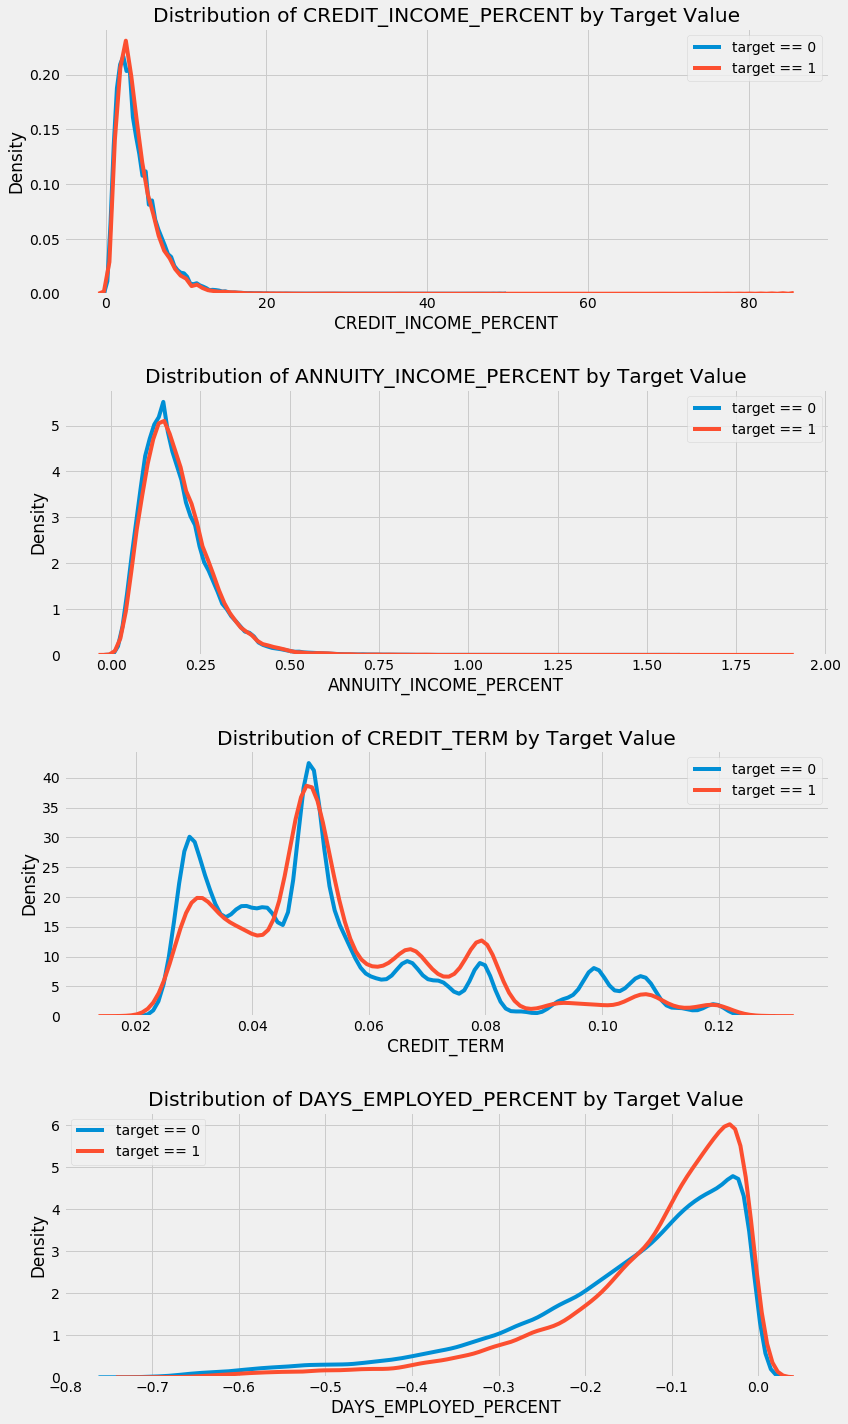

In [38]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

이러한 새로운 기능이 유용 할 지 미리 말하기는 어렵습니다. 확실하게 말할 수있는 것은 머신러닝 모델 학습을 시도하는 것입니다!

# Baseline
naive baseline에서 우리는 모든 관측치들에 대해서 같은 값으로 예측할 수 있습니다. 하지만 우리는 채무 불이행 확률에 대해서 예측하도록 요청 받았습니다. 예측에 대한 확신이 없다면 우리는 0.5의 확률로 예측하게 될 것입니다. 그러면 Reciever Operating Characteristic Area Under the Curve (AUC ROC)에서 0.5의 점수를 받을 것입니다.([무작위로 추측하여 분류를 하면 점수는 0.5가 될 것입니다.](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

우리는 어떤 점수를 받을지 알기 때문에 naive baseline을 사용하여 예측하지는 않을것입니다. Logistic Regression을 사용하여 좀 더 정교한 모델을 사용 할 것입니다. 


## 로지스틱 회귀 구현(Logistic Regression Implementation)

지금부터 세세한 부분에 대해서 설명하기보다는 모델을 구현하는데 집중하겠습니다. 
[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) 와  [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)를 추천합니다.

두 책 모두 이론과 모델을 설계할 때 필요한 코드들을 잘 설명해 줍니다(python과 R 모두).

baseline을 구현하기 위해 모든 범주형 feature들을 인코딩 한 후 사용 할 것입니다. 결측치들은 모두 채워주고 각 피쳐들의 범위를 정규화 해줍니다. 아래의 코드는 이 프로세스들을 모두 수행합니다. 

In [39]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


첫 번째 모델을 구현하기 위해  [`LogisticRegression`from Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 를 사용하겠습니다. 

기본 모델에서 유일하게 조정하는 값은 [regularization parameter](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), 즉 C값 입니다. C값을 낮춤으로써 오버피팅되는것을 컨트롤할 수 있습니다. 이렇게 함으로써 기본 `LogisticRegression`보다 좀 더 나은 결과를 확인할 수 있습니다. 

먼저 모델을 생성합니다. 그리고 `.fit`을 사용하여 모델을 학습시킵니다. 그리고 `.predict_proba`를 사용하여 testing data를 예측합니다. (0이나 1이 아닌 확률을 예측하는것임을 기억해야 합니다.)

In [40]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

모델이 학습되었으므로 이제 예측하는데 사용할 수 있습니다. 채무 불이행의 확률에 대한 예측을 하기 원하므로 `predict.proba`를 사용할 것입니다. 이 함수는 m x 2 의 결과를 반환합니다. 여기서 m은 testing data에 있는 관측수입니다. 첫 번째 칼럼은 target값이 0일 확률, 두 번째 칼럼은 target값이 1일 확률입니다. 그러므로 한 행에서 두 칼럼의 값을 합하면 1이 되어야 합니다. 우리가 관심있는 값은 채무 불이행에 대한 확률이므로 두번 째 칼럼입니다. 다음 코드가 이 과정을 보여줍니다. 

In [41]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

예측은 반드시 아래와 같은 `sample_submission.csv`파일에 있는 형태로 작성되어야 합니다. 두개의 칼럼 `SK_ID_CURR`, `TARGET`이 있습니다. 이러한 형태로 파일을 만들고 이름은 `submit`으로 합니다.

In [42]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


예측값은 0과 1사이의 확률로 나타내어지고 채무 불이행에 대한 확률값입니다. 이 예측값을 사용하여 대출 신청자의 대출이 위험하다는 확률 임계치를 설정할 수 있습니다.

In [43]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

이제 우리의 노트북이 돌고있는 가상환경에 제출파일이 저장되었습니다. 

__logistic regression baseline의 결과를 제출하면  점수는 대략 0.671 정도가 나올 것입니다.__

## Improved Model: Random Forest

baseline의 성능이 마음에 들지 않는다면 우리는 새로운 알고리즘으로 업데이트 할 수 있습니다. 같은 training data에 대해서 Random Forest 를 사용해 보고 성능에 얼마나 영향을 주는지 확인하겠습니다. Random Forest는 100개의 tree를 사용하면 훨씬 강력한 성능을 보여줍니다. 100개의 tree를 사용해 보겠습니다.

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [45]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.9s finished
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [46]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

전체 코드를 실행해야 예측값을 구할 수 있습니다. 

__이 모델의 점수는 대략 0.678입니다.__

### 가공된 피쳐들을 사용하여 예측하기(Make Predictions using Engineered Features)


 Polynomial Features와 Domain knowledge가 모델을 개선했는지 확인하는 방법은 이러한 feature의 모델을 테스트하는 것입니다. feature engineering의 효과를 확인하기 위해 baseline의 제출 결과와 비교할 수 있습니다. 

In [47]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [48]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.4s finished
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [49]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

 0.678을 얻었습니다. baseline 모델과 정확히 동일합니다. 이러한 결과를 감안할 때, 우리의 feature engineering이 도움이되는 것으로 보이지 않습니다. 

#### Testing Domain Features
이번엔 직접 만든 domain feature로 확인해 보겠습니다.

In [50]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.5s finished
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [51]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

점수는 0.679로 여전히 도움이 되지 않았습니다. 하지만 마지막에 있는 Gradient Boosting Model 에는 도움이 됩니다. 

추후의 노트북에서 다른 외부데이터들을 활용하여 [feature engineering](https://docs.featuretools.com/index.html)를 더 할 것입니다. 경험상 이 부분에서는 성능 향상이 있습니다.

## 모델 해석 : Feature Importances


가장 관련성이 높은 변수를 확인하는 간단한 방법으로 random forest의 feature importances를 살펴볼 수 있습니다. 우리가 탐색적 분석에서 예상했던것과 같게 `EXT_SOURCE`와 `DAYS_BIRTH`가 가장 중요한 변수라는것을 확인할 수 있습니다. feature importances는 모델을 해석하거나 차원 축소를 수행하는 가장 정교한 방법은 아니지만 예측을 할 때 모델이 고려한 요인을 이해할 수있게 해줍니다.

In [52]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

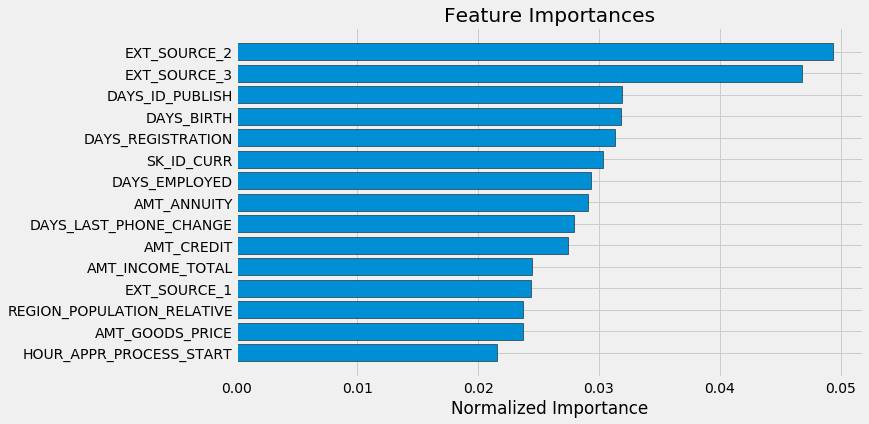

In [53]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

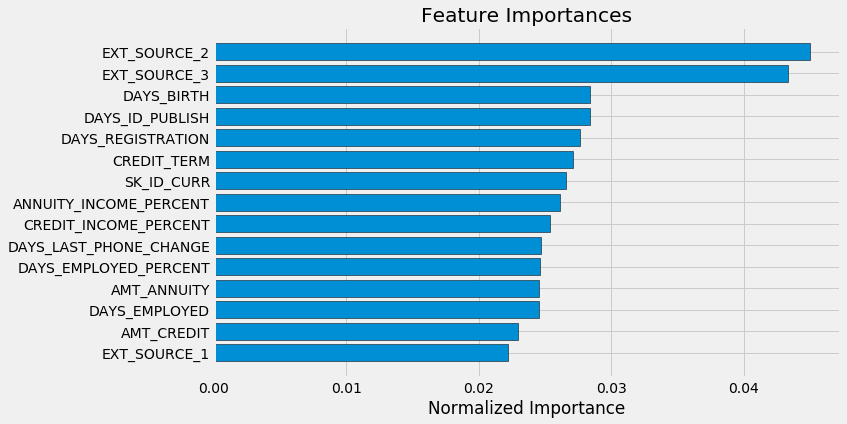

In [54]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

직접 만든 feature가 가장중요한 feature top 15안에 있다는것을 확인할 수 있습니다. 적어도 우리의 도메인 지식이 어느정도 영향을 준다는것을 확인할 수 있습니다. 

# Conclusions

이 노트북에서는 Kaggle 머신러닝 competition을 시작하는 방법을 보았습니다. 우리는 먼저 데이터, 과제 및 제출물을 평가할 수있는 척도를 이해하게되었습니다. 그런 다음 모델링에 도움이 될 수있는 관계, 추세 또는 이상을 확인하기 위해 매우 간단한 EDA를 수행했습니다. 그 과정에서 우리는 범주 형 변수 인코딩, 누락 된 값 입력 및 범위에 대한 기능 확장과 같은 필요한 사전 처리 단계를 수행했습니다. 그런 다음 기존 데이터에서 새로운 기능을 구성하여 모델을 설계할 수 있는지 확인했습니다.

데이터 탐색, 데이터 준비 및 피쳐 엔지니어링이 완료되면 개선 할 수있는 기본 모델을 구현했습니다. 그런 다음 첫 번째 점수를 넘기 위해 약간 더 복잡한 두 번째 모델을 만들었습니다. 우리는 또한 엔지니어링 변수를 추가하는 효과를 결정하기위한 실험을 수행했습니다.


우리는 [machine learning project](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)의 일반적인 개요를 참조했습니다 : 

1. 데이터의 이해
2. 데이터 전처리 (this was mostly done for us)
3. 데이터 탐색
4. Baseline 모델
5. Improved 모델
6. 모델 해석

머신러닝 competitions은 일반적인 데이터 사이언스 문제와 약간의 차이가 있습니다. 하나의 metric에서 좋은 성과를 내는것이 목표이고 해석에 대해서는 신경을 쓰지 않기 때문입니다. 하지만 우리가 설계한 모델이 어떻게 결정을 내리는지 이해하려는 시도로 부터 오류를 줄이기 위해 다양한 시도를 하게됩니다. 추후의 노트북에서 더 많은 데이터 소스를 통합하고, 더 복잡한 모델을 구축하고 (다른 사람들의 코드를 따르면서) 점수를 향상시킬 것입니다.

이 노트북에서 머신러닝 competition에 대해 알려주고 스스로 참여할 수 있는데 도움이 되길 바랍니다. 

이제 노트가 끝났으니, 코드를 실행하기 위해 청색 커밋 & 실행 버튼을 누르십시오. 실행이 완료되면 (약 10 분 소요) 버전 탭과 출력 하위 탭으로 이동하여 만든 파일에 액세스 할 수 있습니다. 제출 파일은이 탭에서 대회에 직접 제출하거나 로컬 컴퓨터로 다운로드하여 저장할 수 있습니다. 마지막으로 노트북 공유를 공유하는 것입니다. 설정 탭으로 이동하여 공개 여부를 공개로 변경하십시오. 전 세계가 당신의 노력을 볼 수있게 해줍니다!


### 다음 단계의 노트북들

좀 더 심화된 내용들을 공부하고 싶은 분들에게 추천드리는 노트북들 입니다.

* [Manual Feature Engineering Part One](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering)
* [Manual Feature Engineering Part Two](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering-p2)
* [Introduction to Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics)
* [Advanced Automated Feature Engineering](https://www.kaggle.com/willkoehrsen/tuning-automated-feature-engineering-exploratory)
* [Feature Selection](https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection)
* [Intro to Model Tuning: Grid and Random Search](https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search)


# Light Gradient Boosting Machine

지금부터는 선택사항입니다. 

 [LightGBM library](http://lightgbm.readthedocs.io/en/latest/Quick-Start.html)를 사용한 
[gradient boosting machine](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/).



Gradient Boosting Machine은 학습을위한 선도적 인 모델이며 competitions에서 좋은 성적을 내기 위해 이 모델이 필요할 것입니다. 코드가 복잡해 보일지라도 완벽한 모델을 구성하는 일련의 작은 단계 일뿐입니다. 이 모델을 사용하여 좀 더 높은 점수를 얻었기 때문에 코드를 추가했습니다. 추후의 노트북에서는 고급 모델, 피쳐 엔지니어링 및 feature selection 을 살펴 볼 것입니다. 다음 노트북에서 뵙겠습니다. 

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [56]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754949	valid's binary_logloss: 0.563125	train's auc: 0.79887	train's binary_logloss: 0.552616
Early stopping, best iteration is:
[208]	valid's auc: 0.755109	valid's binary_logloss: 0.562276	train's auc: 0.80025	train's binary_logloss: 0.551442
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758539	valid's binary_logloss: 0.563479	train's auc: 0.798518	train's binary_logloss: 0.553271
Early stopping, best iteration is:
[217]	valid's auc: 0.758619	valid's binary_logloss: 0.561732	train's auc: 0.801374	train's binary_logloss: 0.55077
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762652	valid's binary_logloss: 0.564246	train's auc: 0.79774	train's binary_logloss: 0.553986
[400]	valid's auc: 0.762202	valid's binary_logloss: 0.546576	train's auc: 0.827288	train's bina

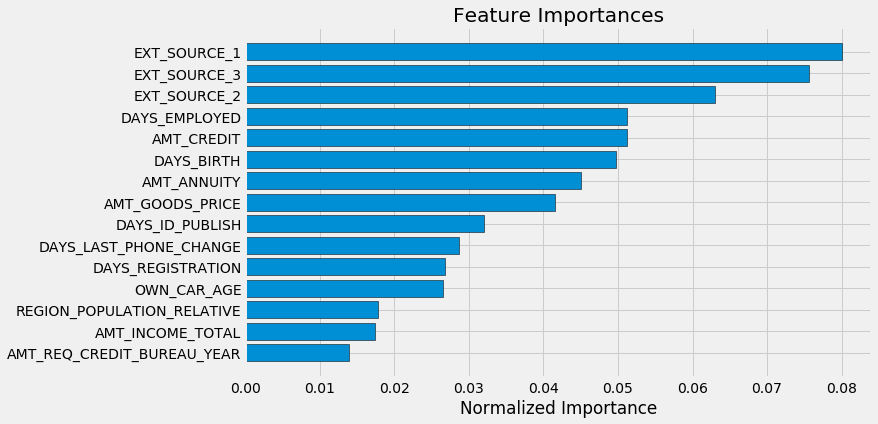

In [57]:
fi_sorted = plot_feature_importances(fi)

In [58]:
submission.to_csv('baseline_lgb.csv', index = False)

이 submission 에서는 약 0.735의 결과를 얻었씁니다. 

In [59]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762577	valid's binary_logloss: 0.557281	train's auc: 0.804531	train's binary_logloss: 0.547193
Early stopping, best iteration is:
[237]	valid's auc: 0.762858	valid's binary_logloss: 0.553438	train's auc: 0.810671	train's binary_logloss: 0.541669
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.765594	valid's binary_logloss: 0.55808	train's auc: 0.804304	train's binary_logloss: 0.547593
Early stopping, best iteration is:
[227]	valid's auc: 0.765861	valid's binary_logloss: 0.555268	train's auc: 0.808665	train's binary_logloss: 0.543656
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.770139	valid's binary_logloss: 0.557892	train's auc: 0.803753	train's binary_logloss: 0.548213
[400]	valid's auc: 0.770328	valid's binary_logloss: 0.538395	train's auc: 0.834338	train's b

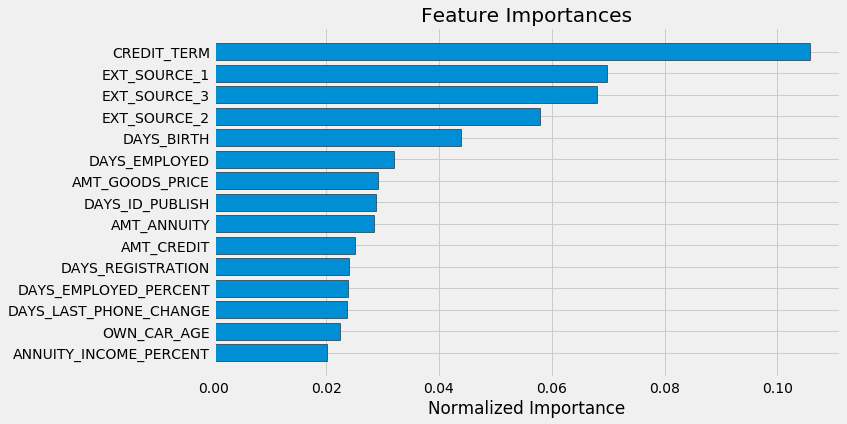

In [60]:
fi_sorted = plot_feature_importances(fi_domain)

 우리는 우리의 feature 중 일부를 가장 중요한 것으로 보았습니다. 앞으로는 다른 도메인 지식이 문제에 유용 할 수 있다고 생각할 필요가 있습니다. 금융 산업에 대해 더 많이 알고있는 사람과 상담해야합니다!


In [61]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)

이 모델의 점수는 0.754 입니다. 도메인 feature가 모델 성능 향상에 영향을 주었다고 판단할 수 있습니다. [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) 는 competition에서 중요한 역할을 할 것입니다. 